Описание проекта: промышленность   
Чтобы оптимизировать производственные расходы, металлургический комбинат «Стальная птица» решил уменьшить потребление электроэнергии на этапе обработки стали. Для этого комбинату нужно контролировать температуру сплава. Ваша задача — построить модель, которая будет её предсказывать.    
Заказчик хочет использовать разработанную модель для имитации технологического процесса. Ниже расскажем о деталях этого процесса. Их важно знать, прежде чем генерировать новые признаки.   

## План работы
Позади много пройденных уроков, вы уже выпускники! Уверены, что вы умеете выделять основные этапы работы и следовать намеченному плану. Тем не менее оставим вам краткий план, который вы сможете дополнить необходимыми, на ваш взгляд, нюансами.   

Шаг 1. Загрузка данных   
Загрузите данные и выполните их первичный осмотр.   
Шаг 2. Исследовательский анализ и предобработка данных   
Выполните исследовательский анализ каждого датафрейма и при необходимости выполните предобработку. Сделайте выводы об имеющихся признаках: понадобятся ли они для обучения моделей.   
Шаг 3. Объединение данных
Объедините выбранные вами признаки в один датафрейм по ключу.   
Шаг 4. Исследовательский анализ и предобработка данных объединённого датафрейма   
Выполните исследовательский анализ объединённого датафрейма, визуализируйте распределения признаков и при необходимости выполните предобработку. Проведите корреляционный анализ. Напоминаем, что вы можете использовать не только имеющиеся признаки, но и генерировать новые.   
Шаг 5. Подготовка данных   
Выполните подготовку данных для обучения модели. Разделите данные на две выборки, при масштабировании и кодировании учитывайте особенности данных и моделей.   
Шаг 6. Обучение моделей машинного обучения   
Обучите как минимум две модели. Хотя бы для одной из них подберите как минимум два гиперпараметра.   
Шаг 7. Выбор лучшей модели   
Выберите лучшую модель и проверьте её качество на тестовой выборке.   
Шаг 8. Общий вывод и рекомендации заказчику   
Сделайте общий вывод о проделанной работе: опишите основные этапы работы, полученные результаты и дайте рекомендации для бизнеса.   

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
    <p>ок, это хороший тон - дать описание проблематики. Поэтому, это можно делать ещё подробнее.</p>
</div>

In [1]:
!pip install catboost

In [2]:
conda install -c conda-forge lightgbm

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.2
  latest version: 24.4.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    joblib-1.4.2               |     pyhd8ed1ab_0         215 KB  conda-forge
    lightgbm-3.1.1             |   py39he80948d_0         1.6 MB  conda-forge
    scikit-learn-0.24.2        |   py39h4dfa638_0         7.6 MB  conda-forge
    scipy-1.5.3                |   py39hee8e79c_0        19.3 MB  conda-forge
    threadpoolctl-3.5.0        |     pyhc1e730c_0          23 KB  conda-forge
    ----------

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
#from lightgbm import LGBMRegressor

# Шаг 1. Загрузка данных

arc_new = pd.read_csv('/Users/andrejkazancev/Desktop/Выпускной проект/data_arc_new.csv')
bulk_new = pd.read_csv('/Users/andrejkazancev/Desktop/Выпускной проект/data_bulk_new.csv')
bulk_time_new = pd.read_csv('/Users/andrejkazancev/Desktop/Выпускной проект/data_bulk_time_new.csv')
gas_new = pd.read_csv('/Users/andrejkazancev/Desktop/Выпускной проект/data_gas_new.csv')
temp_new = pd.read_csv('/Users/andrejkazancev/Desktop/Выпускной проект/data_temp_new.csv')
wire_new = pd.read_csv('/Users/andrejkazancev/Desktop/Выпускной проект/data_wire_new.csv')
wire_time_new = pd.read_csv('/Users/andrejkazancev/Desktop/Выпускной проект/data_wire_time_new.csv')

In [4]:
try:
    arc_new = pd.read_csv('/Users/andrejkazancev/Desktop/Выпускной проект/data_arc_new.csv')
    bulk_new = pd.read_csv('/Users/andrejkazancev/Desktop/Выпускной проект/data_bulk_new.csv')
    bulk_time_new = pd.read_csv('/Users/andrejkazancev/Desktop/Выпускной проект/data_bulk_time_new.csv')
    gas_new = pd.read_csv('/Users/andrejkazancev/Desktop/Выпускной проект/data_gas_new.csv')
    temp_new = pd.read_csv('/Users/andrejkazancev/Desktop/Выпускной проект/data_temp_new.csv')
    wire_new = pd.read_csv('/Users/andrejkazancev/Desktop/Выпускной проект/data_wire_new.csv')
    wire_time_new = pd.read_csv('/Users/andrejkazancev/Desktop/Выпускной проект/data_wire_time_new.csv')
except:
    arc_new = pd.read_csv('/datasets/data_arc_new.csv')
    bulk_new = pd.read_csv('/datasets/data_bulk_new.csv')
    bulk_time_new = pd.read_csv('/datasets/data_bulk_time_new.csv')
    gas_new = pd.read_csv('/datasets/data_gas_new.csv')
    temp_new = pd.read_csv('/datasets/data_temp_new.csv')
    wire_new = pd.read_csv('/datasets/data_wire_new.csv')
    wire_time_new = pd.read_csv('/datasets/data_wire_time_new.csv')        

In [5]:
arc_new.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


Загрузили данные. На слелдующем шаге будем смотреть.

# Шаг 2. Исследовательский анализ и предобработка данных.

Данных много, 7 файлов. Поэтому напишем функцию, чтобы она показывала нам "джентельменский набор" знакомства с данными, а так же строила гистограмму и боксплот для каждого столибка. 

In [6]:
arc_description = 'data_arc_new.csv — данные об электродах'
bulk_description = 'data_bulk_new.csv — данные о подаче сыпучих материалов (объём)'
bulk_time_description = 'data_bulk_time_new.csv — данные о подаче сыпучих материалов (время)'
gas_description = 'data_gas_new.csv — данные о продувке сплава газом'
temp_description = 'data_temp_new.csv — результаты измерения температуры'
wire_description = 'data_wire_new.csv — данные о проволочных материалах (объём)'
wire_time_description = 'data_wire_time_new.csv — данные о проволочных материалах (время)'
data_description = 'Итоговый датафрейм'

In [7]:
def explore_dataframe(df, description):
    print(f"Основная информация о наборе данных:\n{description}\n")
    
    df_name = description.split(' — ')[0]
    
    print(f"Основная информация о {df_name}:")
    print(df.info())
    
    print(f"\nПервые 5 строк {df_name}:")
    print(df.head())
    
    print(f"\nОписательная статистика числовых столбцов для {df_name}:")
    print(df.describe())
    
    print(f"\nКоличество пропущенных значений для каждого столбца в {df_name}:")
    print(df.isna().sum())

    num_cols = df.select_dtypes(include=['number']).columns
    for col in num_cols:
        # Гистограмма распределения
        plt.figure(figsize=(10, 4))
        sns.histplot(df[col].dropna(), kde=True, color='cyan', edgecolor='black', bins=100)
        plt.title(f'Гистограмма распределения {col}', fontsize=15)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Количество', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(True)
        plt.show()
        
        # Боксплот
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[col].dropna(), color='magenta')
        plt.title(f'Боксплот для {col}', fontsize=15)
        plt.xlabel(col, fontsize=12)
        plt.xticks(fontsize=10)
        plt.grid(True)
        plt.show()



Основная информация о наборе данных:
data_arc_new.csv — данные об электродах

Основная информация о data_arc_new.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
None

Первые 5 строк data_arc_new.csv:
   key Начало нагрева дугой  Конец нагрева дугой  Активная мощность  \
0    1  2019-05-03 11:02:14  2019-05-03 11:06:02           0.305130   
1    1  2019-05-03 11:07:28  2019-05-03 11:10:33           0.765658   
2    1  2019-05-03 11:11:44  2019-05-03 11:14:36           0.580313   
3    1  2019-05-03 11:18:14  2

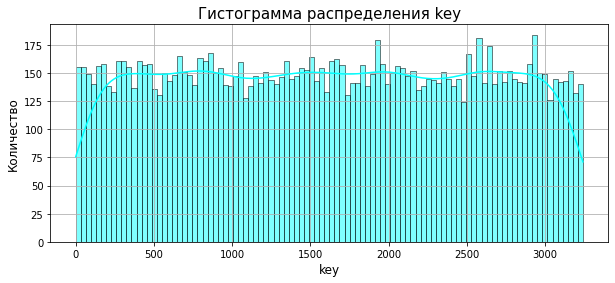

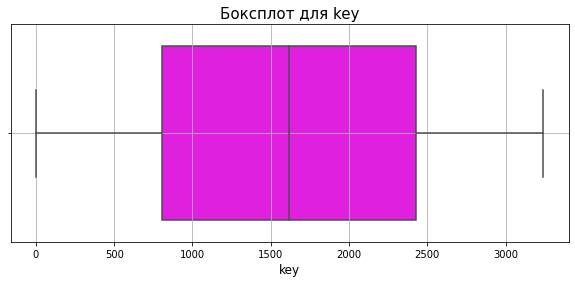

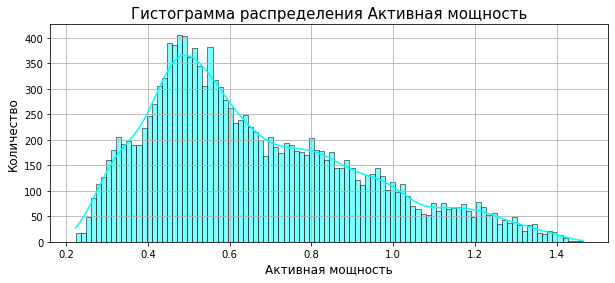

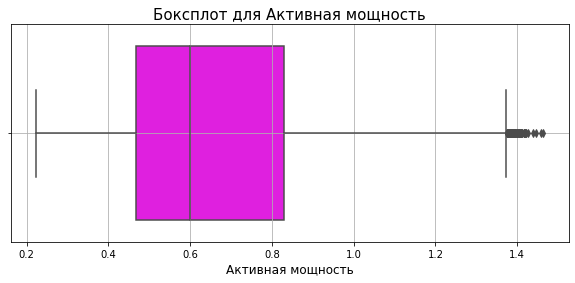

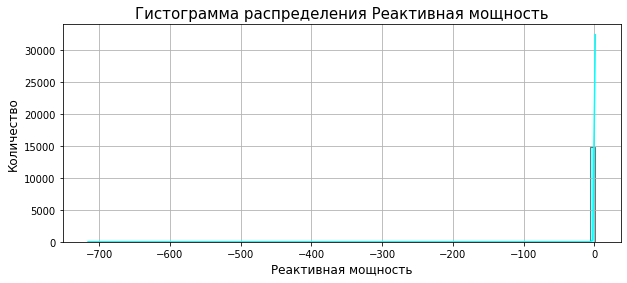

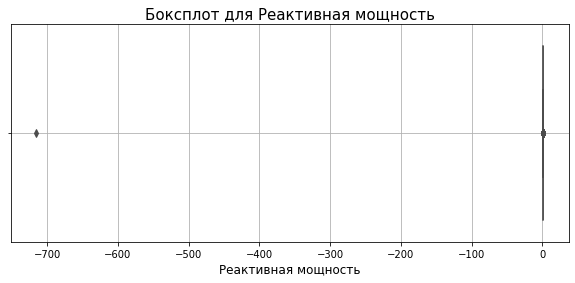

In [8]:
explore_dataframe(arc_new, arc_description)

In [9]:
arc_new = arc_new[arc_new['Реактивная мощность'] != -715.479924]

In [10]:
arc_new['Начало нагрева дугой'] = pd.to_datetime(arc_new['Начало нагрева дугой'])
arc_new['Конец нагрева дугой'] = pd.to_datetime(arc_new['Конец нагрева дугой'])
arc_new['Общее время нагрева дугой'] = arc_new['Конец нагрева дугой'] - arc_new['Начало нагрева дугой']

In [11]:
arc_new['Общее время нагрева дугой'] = arc_new['Общее время нагрева дугой'].dt.seconds

In [12]:
arc_new.head(20)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Общее время нагрева дугой
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.381124,0.220351,137
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.261665,0.205527,338
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.710297,0.484962,126
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.786322,0.542517,210
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.101678,0.820856,280


Посмотрели первый датасет. Сразу удалили явный выброс в столбике реактивная мощность. Привели данные времени в правильный формат и добавили столбик со временем нагрева. Дальше даты мы брать не будем, в вот время нагрева дугой думаю возьмем. Еще раз посмотрели на данные вывели табличку из 20 первых строк на экран. Красивая табличка.

Основная информация о наборе данных:
data_bulk_new.csv — данные о подаче сыпучих материалов (объём)

Основная информация о data_bulk_new.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB
None

Первые 5

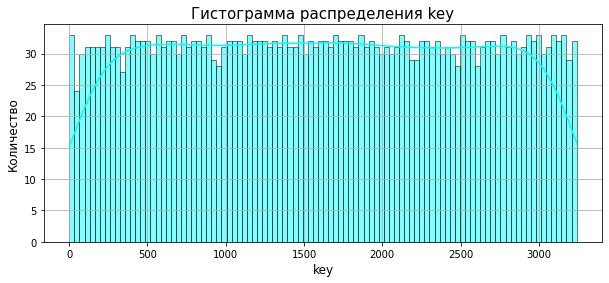

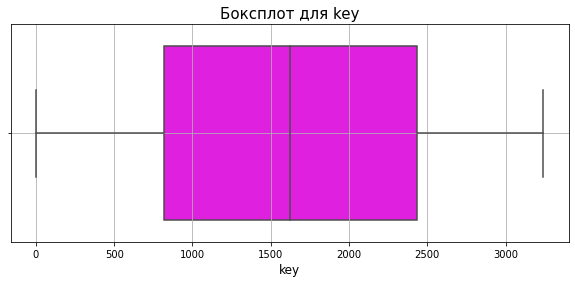

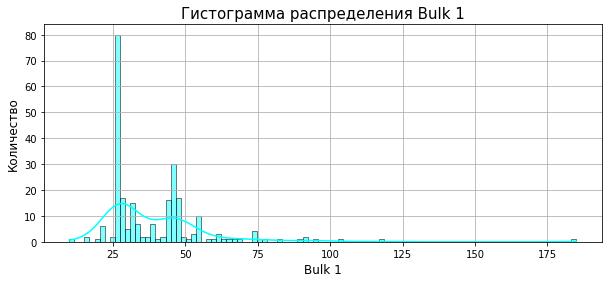

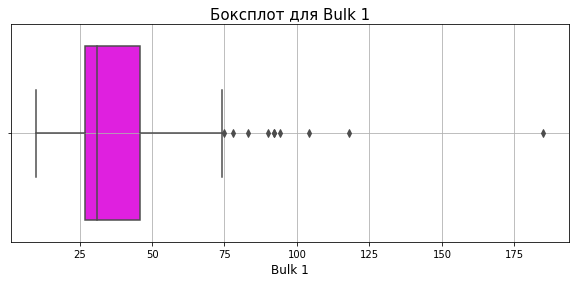

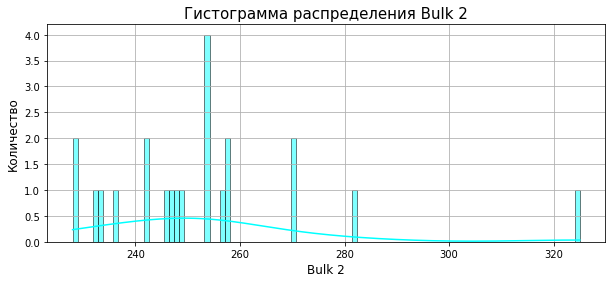

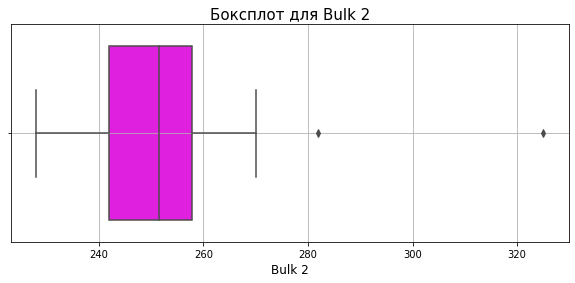

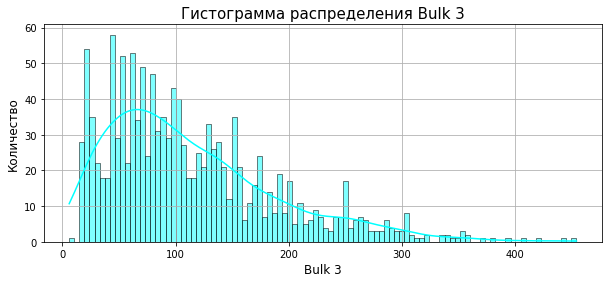

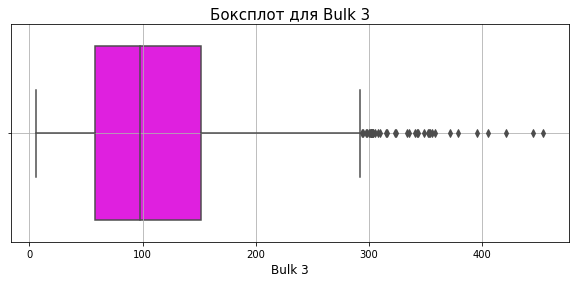

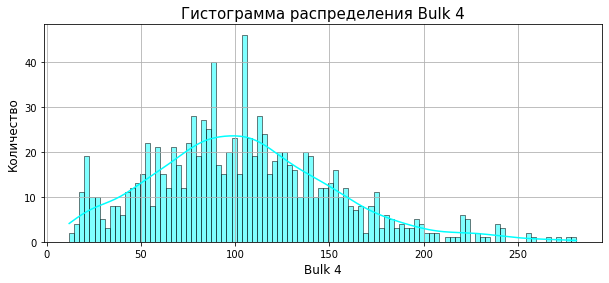

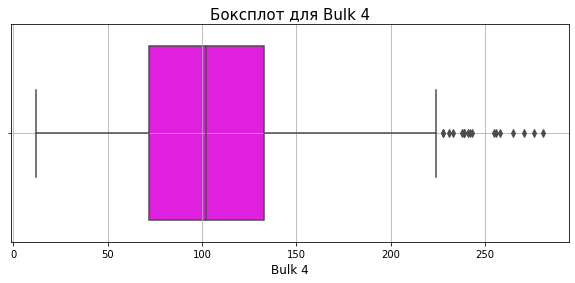

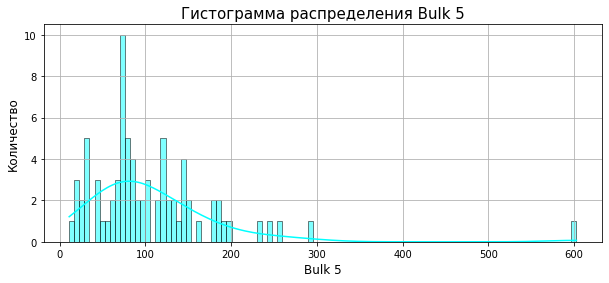

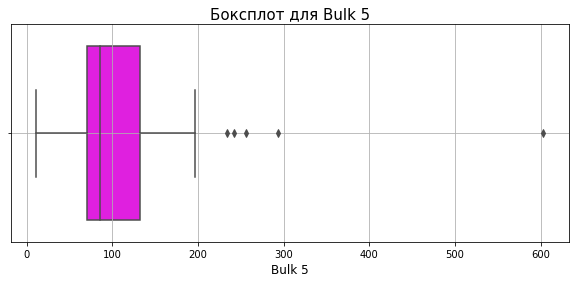

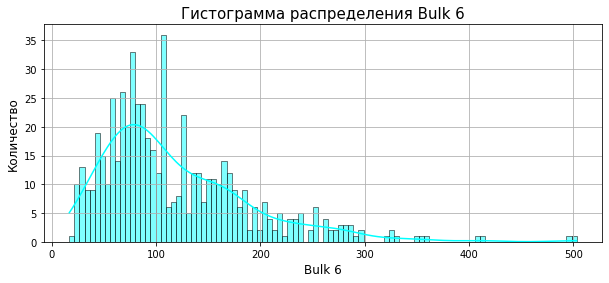

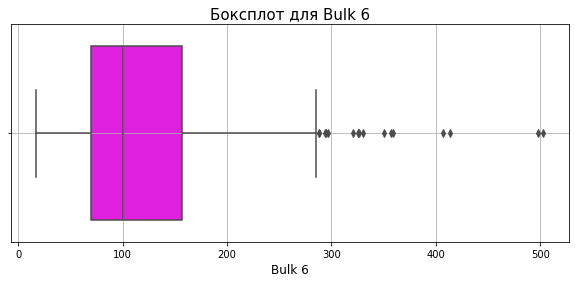

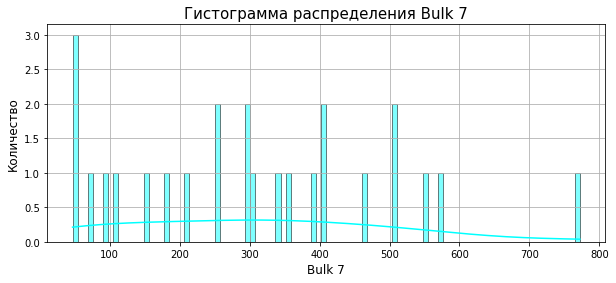

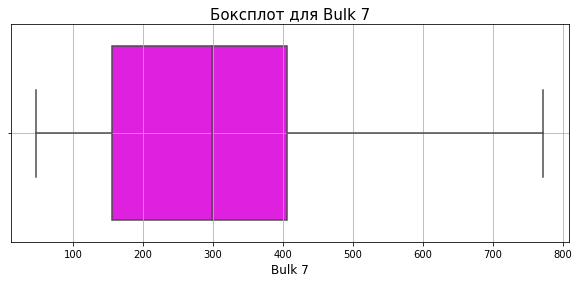

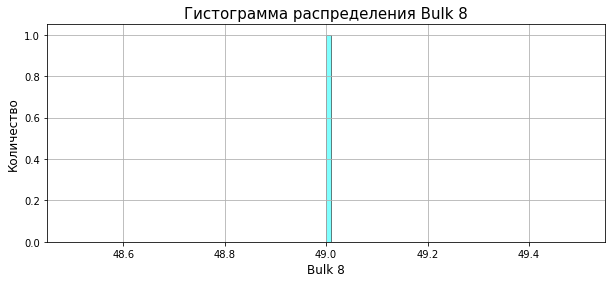

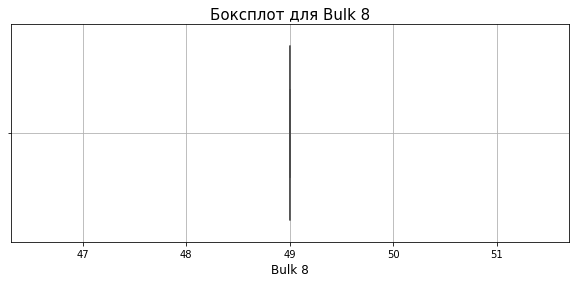

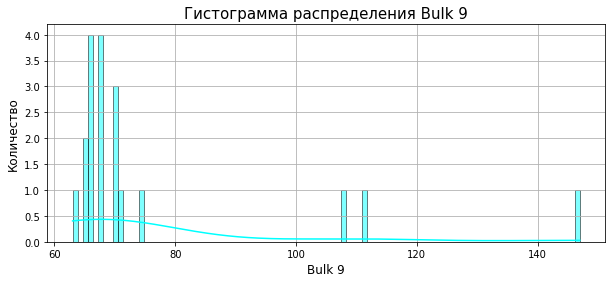

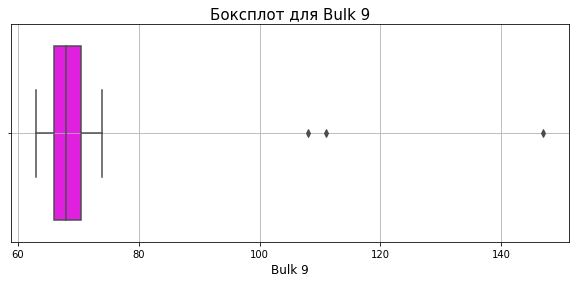

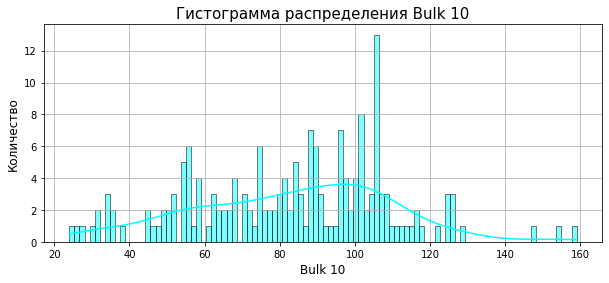

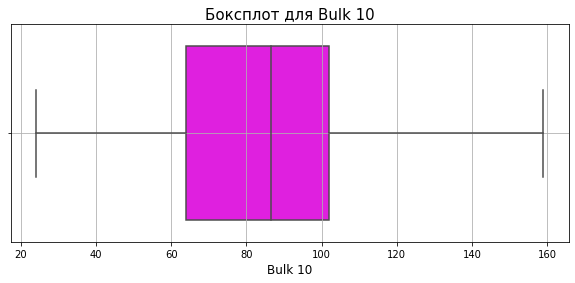

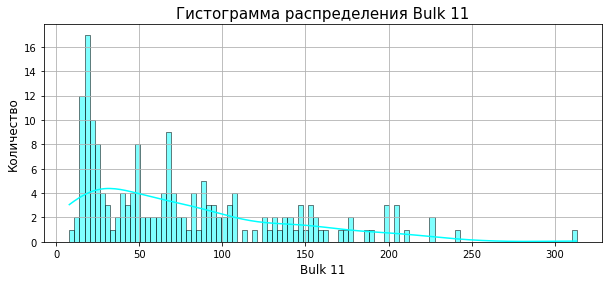

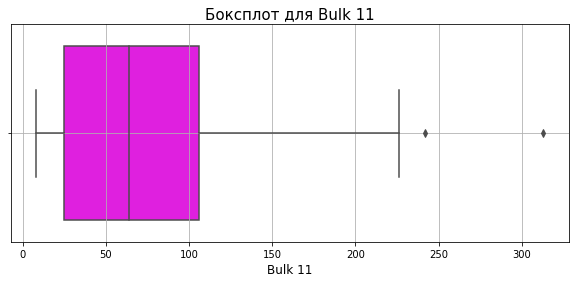

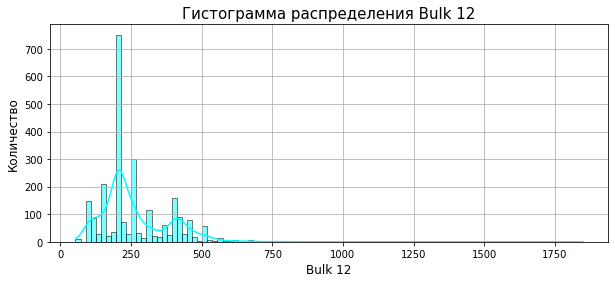

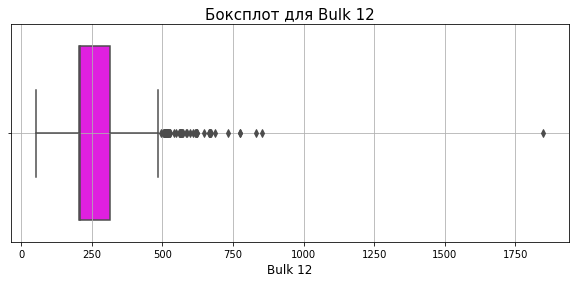

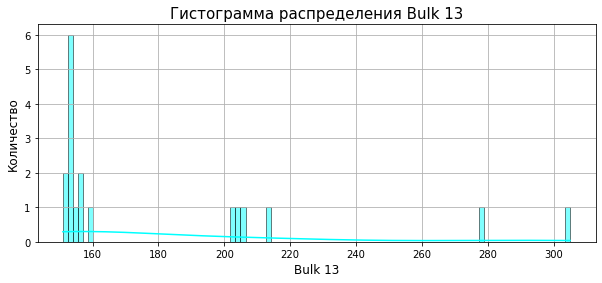

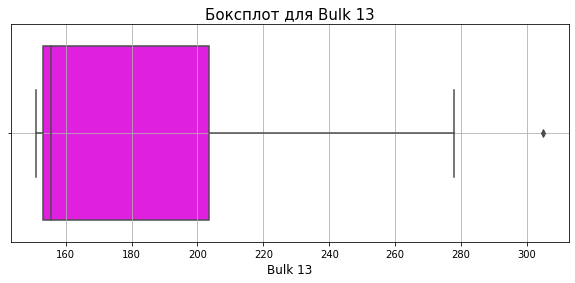

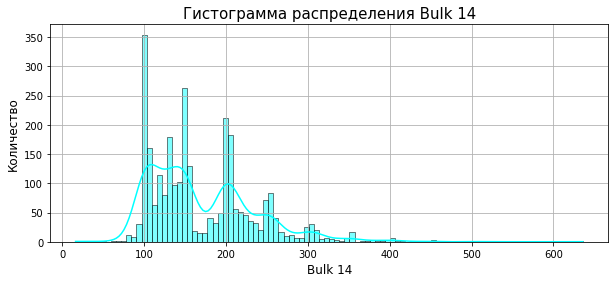

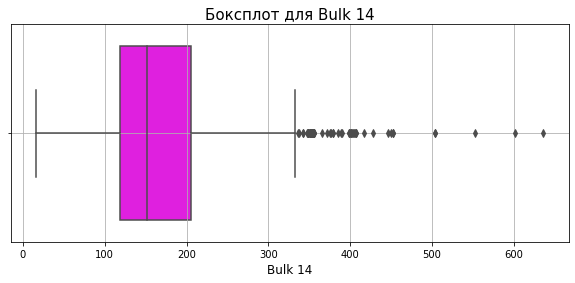

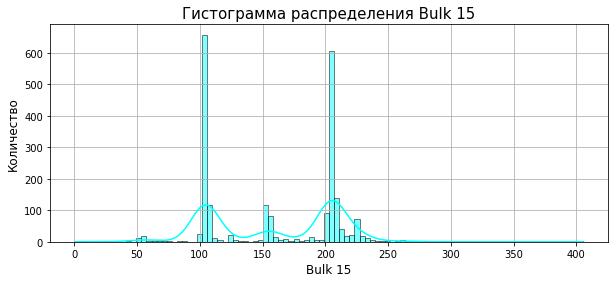

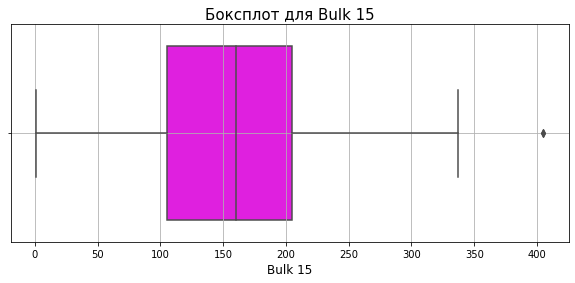

In [13]:
explore_dataframe(bulk_new, bulk_description)

In [14]:
def show_missing_data(df):
    result = pd.DataFrame()
    result['missing_values_count'] = df.isnull().sum()
    result['missing_values_percent'] = (df.isnull().sum() / df.shape[0]) * 100
    return result

In [15]:
show_missing_data(bulk_new)

,missing_values_count,missing_values_percent
key,0,0.000000
Bulk 1,2877,91.946309
Bulk 2,3107,99.296900
Bulk 3,1831,58.517098
Bulk 4,2115,67.593480
Bulk 5,3052,97.539150
Bulk 6,2553,81.591563
Bulk 7,3104,99.201023
Bulk 8,3128,99.968041
Bulk 9,3110,99.392777


Все бы и ничего вот только очень много пропусков в неоторых столбиках. Решил не делать дополнительный толбик с объединенными признаками. Удалю "Булки" у которых большая часть пропусков и снова посмотрю датасет.

In [16]:
columns_to_drop = ['Bulk 1', 'Bulk 2', 'Bulk 5', 'Bulk 6', 'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 13']
bulk_new.drop(columns=columns_to_drop, inplace=True)
bulk_new = bulk_new.fillna(0)

Основная информация о наборе данных:
data_bulk_new.csv — данные о подаче сыпучих материалов (объём)

Основная информация о data_bulk_new.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 3   3129 non-null   float64
 2   Bulk 4   3129 non-null   float64
 3   Bulk 12  3129 non-null   float64
 4   Bulk 14  3129 non-null   float64
 5   Bulk 15  3129 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 146.8 KB
None

Первые 5 строк data_bulk_new.csv:
   key  Bulk 3  Bulk 4  Bulk 12  Bulk 14  Bulk 15
0    1     0.0    43.0    206.0    150.0    154.0
1    2     0.0    73.0    206.0    149.0    154.0
2    3     0.0    34.0    205.0    152.0    153.0
3    4     0.0    81.0    207.0    153.0    154.0
4    5     0.0    78.0    203.0    151.0    152.0

Описательная статистика числовых столбцов для data_bulk

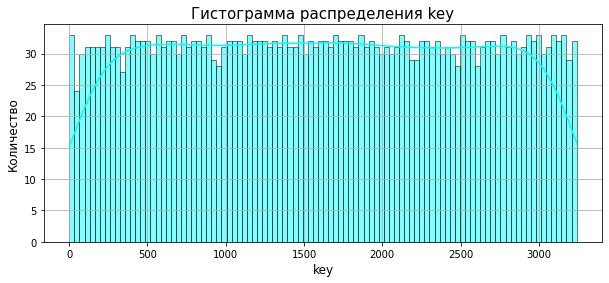

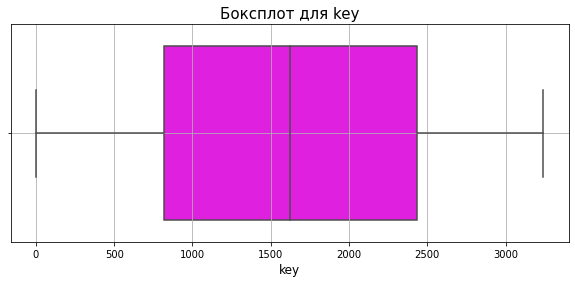

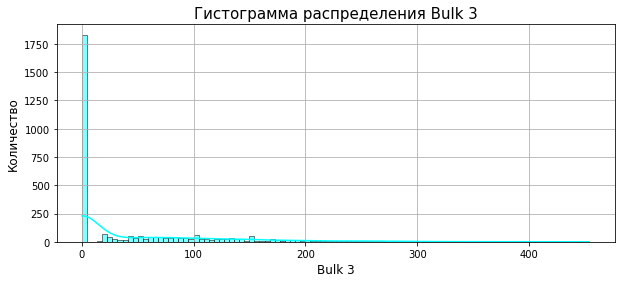

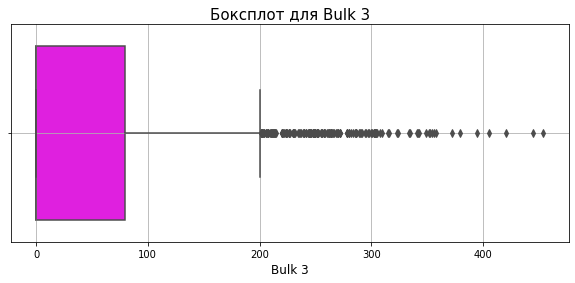

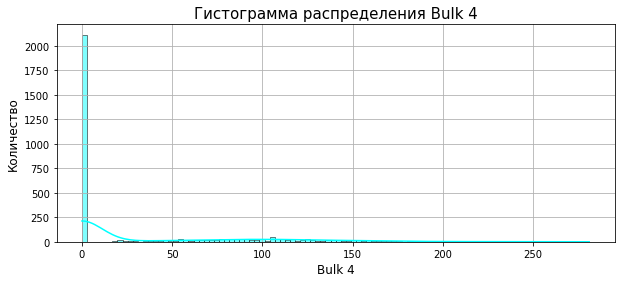

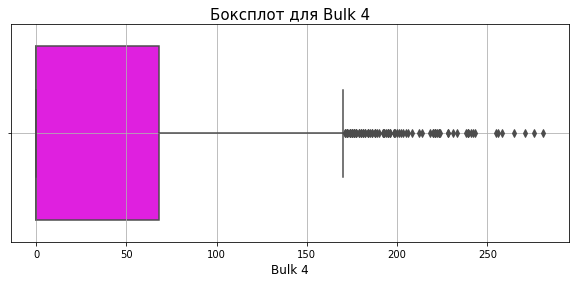

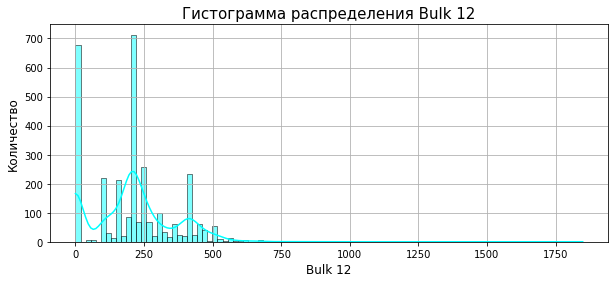

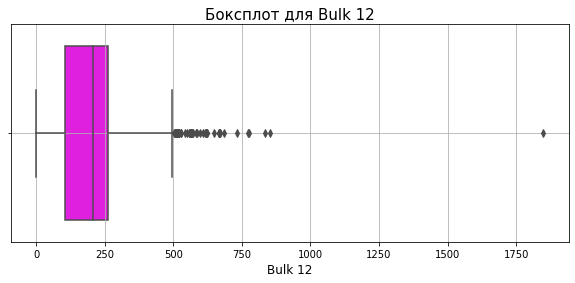

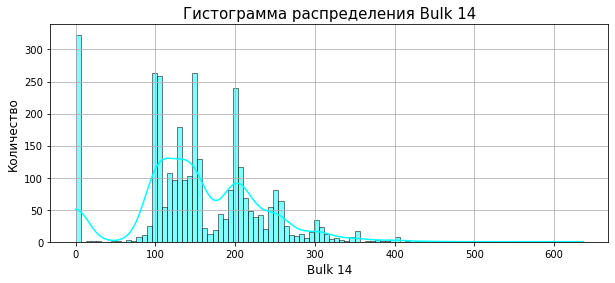

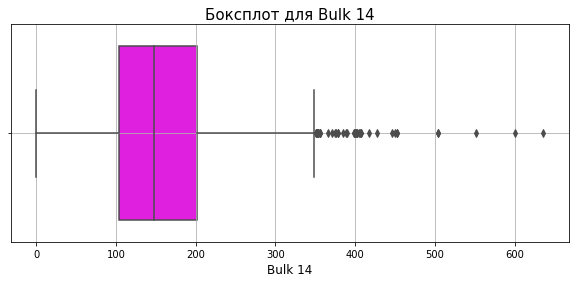

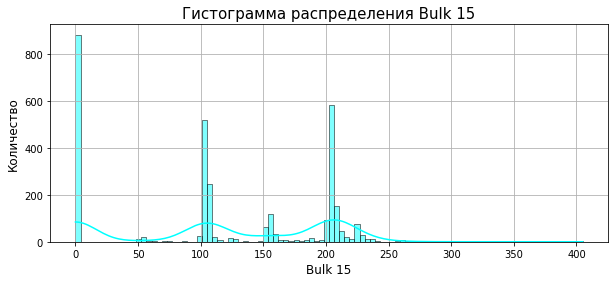

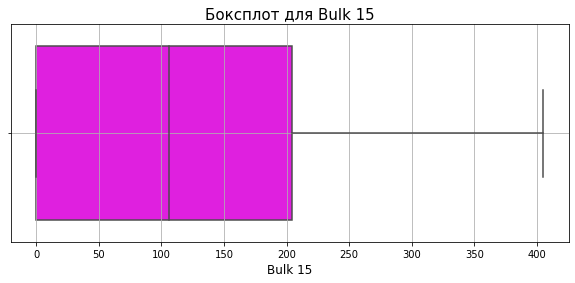

In [17]:
explore_dataframe(bulk_new, bulk_description)

Посмотрели, дальше решил пока не трогать..

In [18]:
bulk_time_new.drop(columns=columns_to_drop, inplace=True)

In [19]:
# Список столбцов для преобразования в datetime
columns_to_convert = ['Bulk 3', 'Bulk 4', 'Bulk 12', 'Bulk 14', 'Bulk 15']

# Использование цикла для преобразования каждого указанного столбца
for column in columns_to_convert:
    bulk_time_new[column] = pd.to_datetime(bulk_time_new[column])


Основная информация о наборе данных:
data_bulk_time_new.csv — данные о подаче сыпучих материалов (время)

Основная информация о data_bulk_time_new.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 3   1298 non-null   datetime64[ns]
 2   Bulk 4   1014 non-null   datetime64[ns]
 3   Bulk 12  2450 non-null   datetime64[ns]
 4   Bulk 14  2806 non-null   datetime64[ns]
 5   Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](5), int64(1)
memory usage: 146.8 KB
None

Первые 5 строк data_bulk_time_new.csv:
   key Bulk 3              Bulk 4             Bulk 12             Bulk 14  \
0    1    NaT 2019-05-03 11:28:48 2019-05-03 11:24:31 2019-05-03 11:14:50   
1    2    NaT 2019-05-03 11:36:50 2019-05-03 11:53:30 2019-05-03 11:48:37   
2    3    NaT 2019-05-03 12:32:39 2019-05-03 12

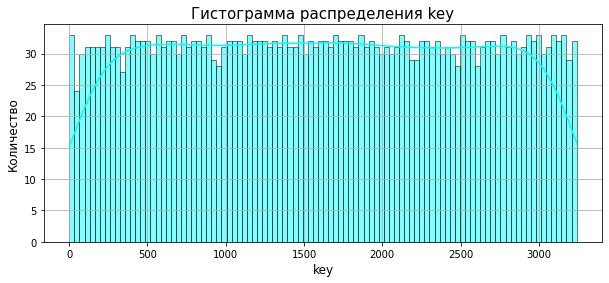

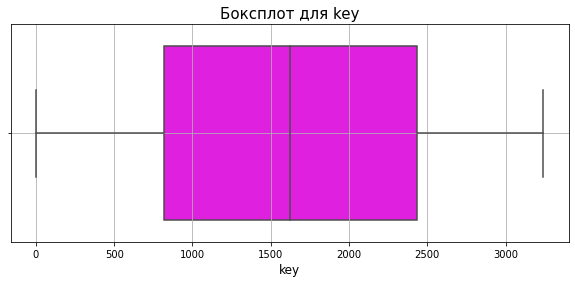

In [20]:
explore_dataframe(bulk_time_new, bulk_time_description)

Основная информация о наборе данных:
data_gas_new.csv — данные о продувке сплава газом

Основная информация о data_gas_new.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None

Первые 5 строк data_gas_new.csv:
   key      Газ 1
0    1  29.749986
1    2  12.555561
2    3  28.554793
3    4  18.841219
4    5   5.413692

Описательная статистика числовых столбцов для data_gas_new.csv:
               key        Газ 1
count  3239.000000  3239.000000
mean   1621.861377    11.002062
std     935.386334     6.220327
min       1.000000     0.008399
25%     812.500000     7.043089
50%    1622.000000     9.836267
75%    2431.500000    13.769915
max    3241.000000    77.995040

Количество пропущенных значений для каждого столбца в data_gas_new

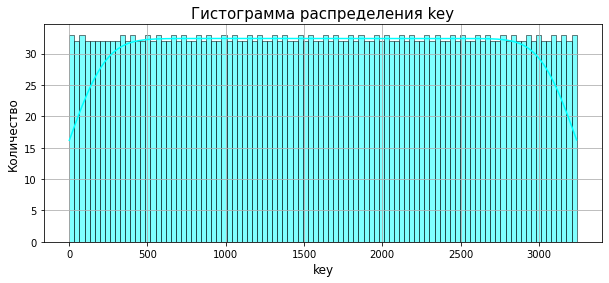

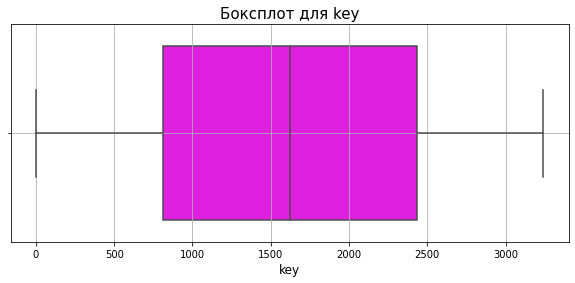

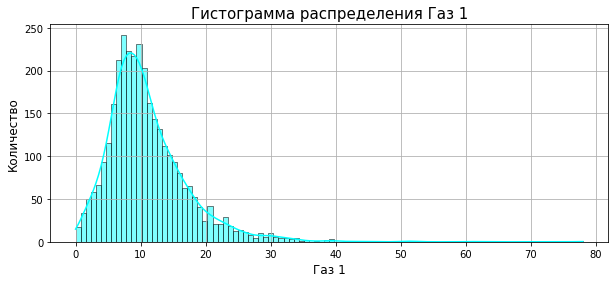

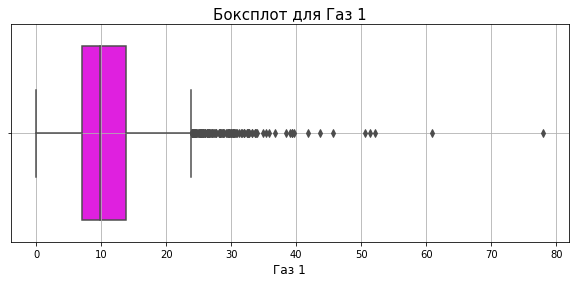

In [21]:
gas_new = gas_new.fillna(0)
explore_dataframe(gas_new, gas_description)

Основная информация о наборе данных:
data_temp_new.csv — результаты измерения температуры

Основная информация о data_temp_new.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB
None

Первые 5 строк data_temp_new.csv:
   key         Время замера  Температура
0    1  2019-05-03 11:02:04       1571.0
1    1  2019-05-03 11:07:18       1604.0
2    1  2019-05-03 11:11:34       1618.0
3    1  2019-05-03 11:18:04       1601.0
4    1  2019-05-03 11:25:59       1606.0

Описательная статистика числовых столбцов для data_temp_new.csv:
                key   Температура
count  18092.000000  14665.000000
mean    1616.460977   1590.722741
std      934.641385     20.

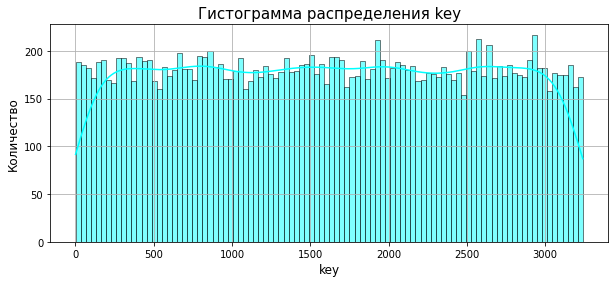

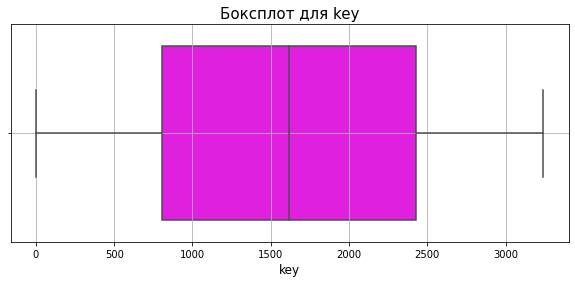

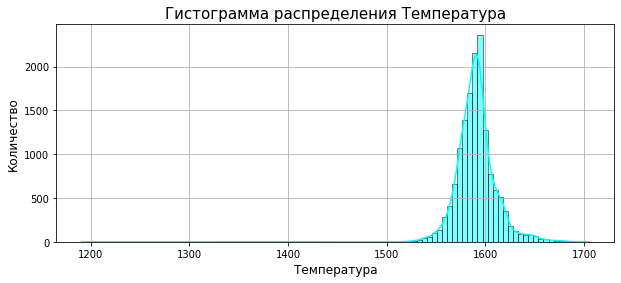

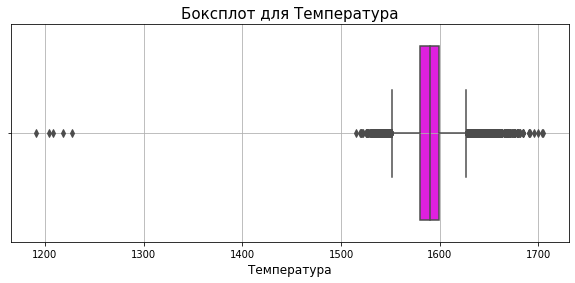

In [23]:
explore_dataframe(temp_new, temp_description)

In [24]:
temp_new.query('key == 3000')

,key,Время замера,Температура
16804,3000,2019-08-29 09:48:33,1609.0
16805,3000,2019-08-29 09:53:47,NaN
16806,3000,2019-08-29 10:00:59,NaN
16807,3000,2019-08-29 10:06:16,NaN


In [25]:
temp_new['Время замера'] = pd.to_datetime(temp_new['Время замера'])
temp_new

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
...,...,...,...
18087,3241,2019-09-06 16:55:01,NaN
18088,3241,2019-09-06 17:06:38,NaN
18089,3241,2019-09-06 17:21:48,NaN
18090,3241,2019-09-06 17:24:44,NaN


In [27]:
temp_new.sort_values(['key', 'Время замера'], inplace=True)

# Группируем данные по ключу и используем any() для определения наличия NaN в любой температуре по ключу
keys_with_nan =temp_new[temp_new['Температура'].isna()]['key'].unique()

# После определения ключей с NaN, исключаем их из исходного DataFrame
combined = temp_new[~temp_new['key'].isin(keys_with_nan) & (temp_new['Температура'] >= 1500)]

# Вывод очищенного DataFrame
combined

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
...,...,...,...
13921,2499,2019-08-10 13:33:21,1569.0
13922,2499,2019-08-10 13:41:34,1604.0
13923,2499,2019-08-10 13:46:28,1593.0
13924,2499,2019-08-10 13:54:56,1588.0


In [28]:
first_measurements = combined.groupby('key').first().reset_index()
last_measurements = combined.groupby('key').last().reset_index()

combined_data = pd.merge(first_measurements, last_measurements, on='key', suffixes=('_first', '_last'))

combined_data.rename(columns={
    'Температура_first': 'Первая температура',
    'Время замера_first': 'Время первой замеры',
    'Температура_last': 'Последняя температура',
    'Время замера_last': 'Время последней замеры'
}, inplace=True)

combined_data['Время между замерами'] = (
    combined_data['Время последней замеры'] - combined_data['Время первой замеры']
).dt.seconds

combined_data

,key,Время первой замеры,Первая температура,Время последней замеры,Последняя температура,Время между замерами
0,1,2019-05-03 11:02:04,1571.0,2019-05-03 11:30:38,1613.0,1714
1,2,2019-05-03 11:34:04,1581.0,2019-05-03 11:55:09,1602.0,1265
2,3,2019-05-03 12:06:44,1596.0,2019-05-03 12:35:57,1599.0,1753
3,4,2019-05-03 12:39:27,1601.0,2019-05-03 12:59:47,1625.0,1220
4,5,2019-05-03 13:11:03,1576.0,2019-05-03 13:36:39,1602.0,1536
...,...,...,...,...,...,...
2472,2495,2019-08-10 11:27:47,1570.0,2019-08-10 11:50:47,1591.0,1380
2473,2496,2019-08-10 11:56:48,1554.0,2019-08-10 12:25:13,1591.0,1705
2474,2497,2019-08-10 12:37:26,1571.0,2019-08-10 12:53:28,1589.0,962
2475,2498,2019-08-10 12:58:11,1591.0,2019-08-10 13:23:31,1594.0,1520


In [29]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 0 to 2476
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   key                     2477 non-null   int64         
 1   Время первой замеры     2477 non-null   datetime64[ns]
 2   Первая температура      2477 non-null   float64       
 3   Время последней замеры  2477 non-null   datetime64[ns]
 4   Последняя температура   2477 non-null   float64       
 5   Время между замерами    2477 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2)
memory usage: 135.5 KB


In [34]:
combined_data#.info()

,key,Время первой замеры,Первая температура,Время последней замеры,Последняя температура,Время между замерами
0,1,2019-05-03 11:02:04,1571.0,2019-05-03 11:30:38,1613.0,1714
1,2,2019-05-03 11:34:04,1581.0,2019-05-03 11:55:09,1602.0,1265
2,3,2019-05-03 12:06:44,1596.0,2019-05-03 12:35:57,1599.0,1753
3,4,2019-05-03 12:39:27,1601.0,2019-05-03 12:59:47,1625.0,1220
4,5,2019-05-03 13:11:03,1576.0,2019-05-03 13:36:39,1602.0,1536
...,...,...,...,...,...,...
2472,2495,2019-08-10 11:27:47,1570.0,2019-08-10 11:50:47,1591.0,1380
2473,2496,2019-08-10 11:56:48,1554.0,2019-08-10 12:25:13,1591.0,1705
2474,2497,2019-08-10 12:37:26,1571.0,2019-08-10 12:53:28,1589.0,962
2475,2498,2019-08-10 12:58:11,1591.0,2019-08-10 13:23:31,1594.0,1520


<div>
    <p><u><b>КОММЕНТАРИИ СТУДЕНТА</b></u></p>
    <p>Так вроде с решеточкой код. Решил не удалять, так в общем-то и думал. Или что-то не так понял?</p>
</div>

In [35]:
combined_data.query('key == 3000')

,key,Время первой замеры,Первая температура,Время последней замеры,Последняя температура,Время между замерами


Основная информация о наборе данных:
data_wire_new.csv — данные о проволочных материалах (объём)

Основная информация о data_wire_new.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
None

Первые 5 строк data_wire_new.csv:
   key     Wire 1   Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  Wire 8  \
0    1  60.059998      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    2  96.052315      NaN     NaN     NaN     NaN     NaN    

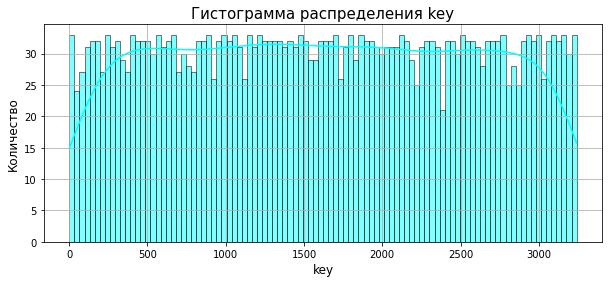

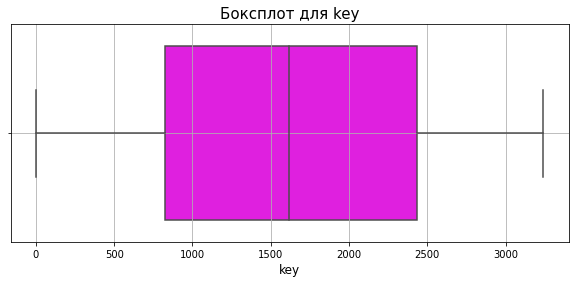

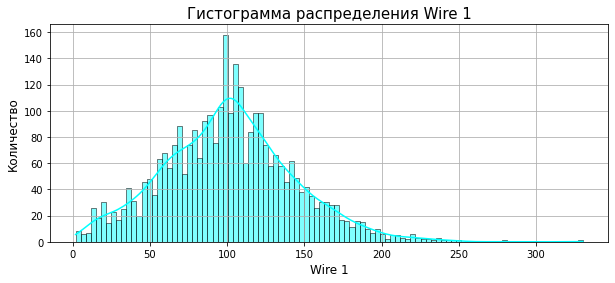

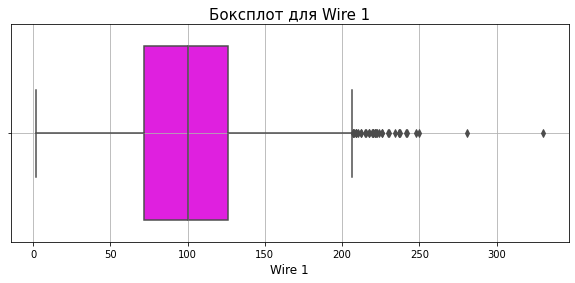

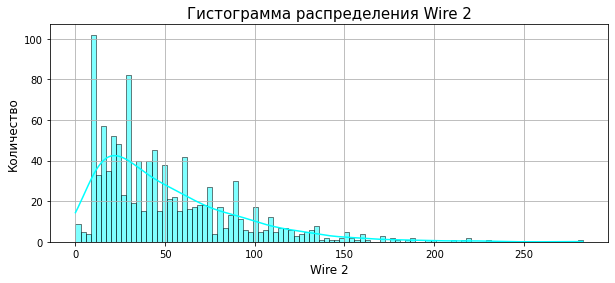

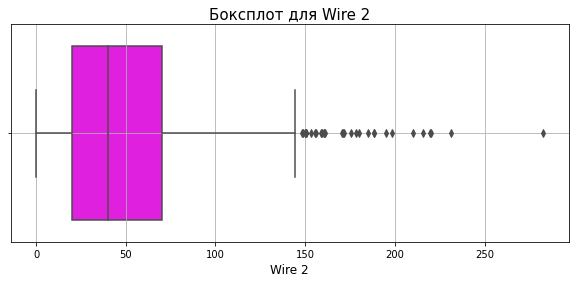

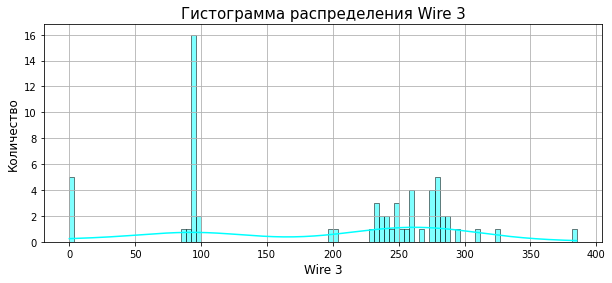

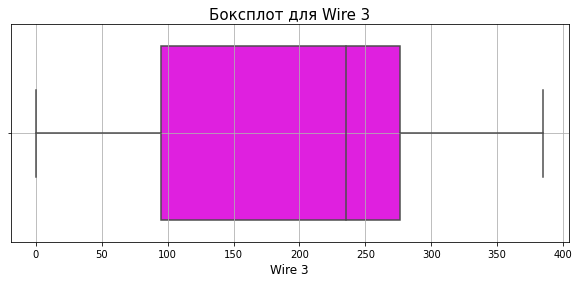

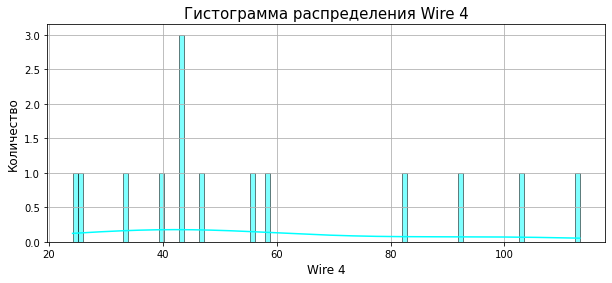

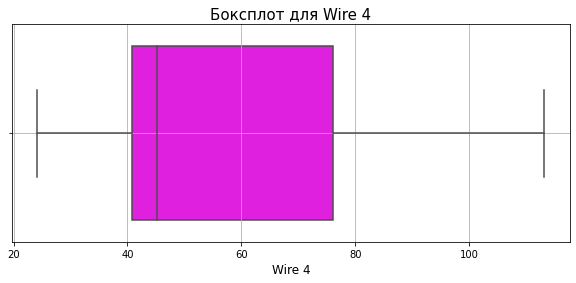

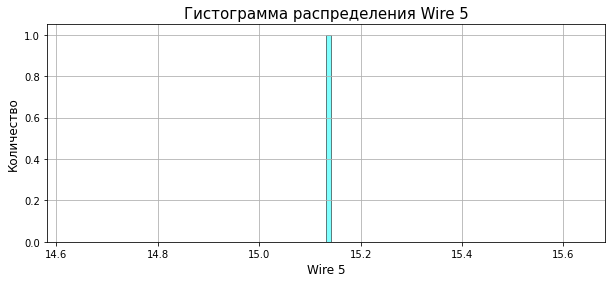

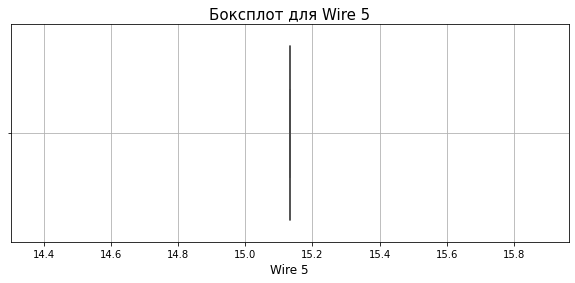

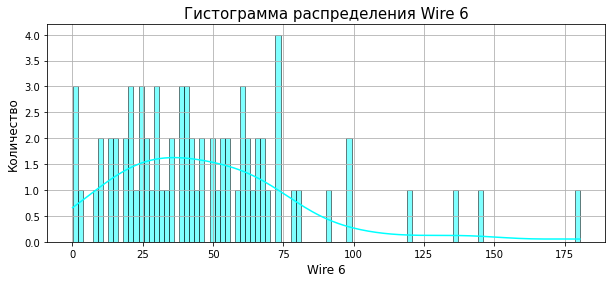

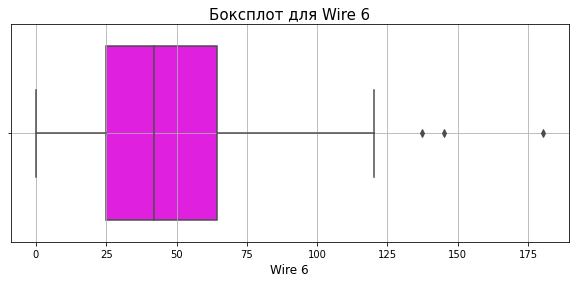

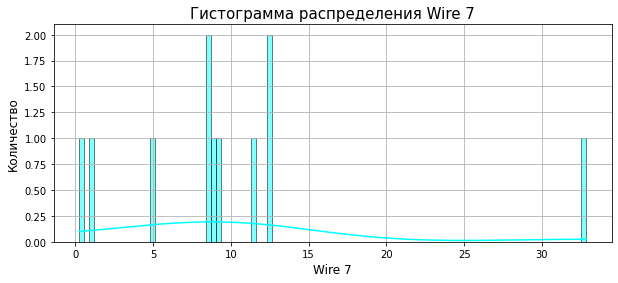

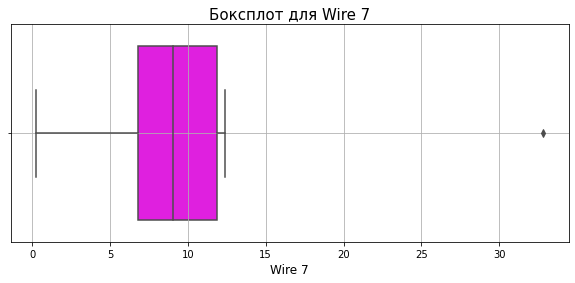

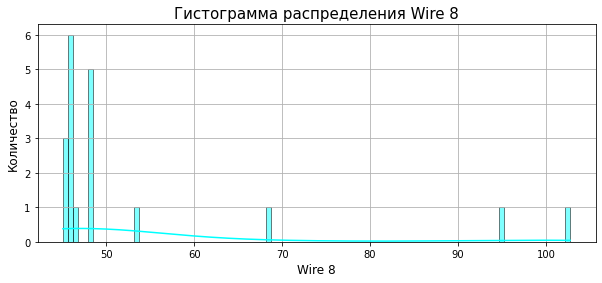

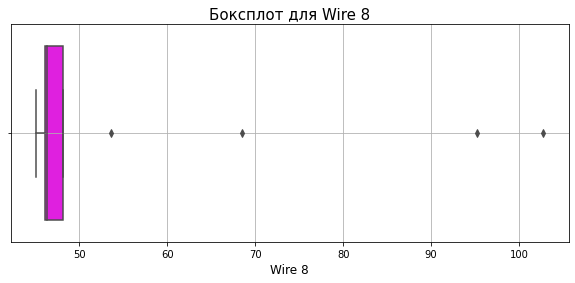

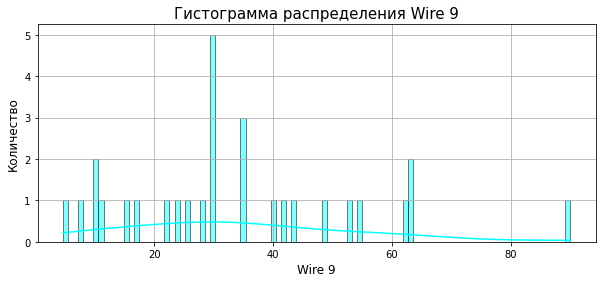

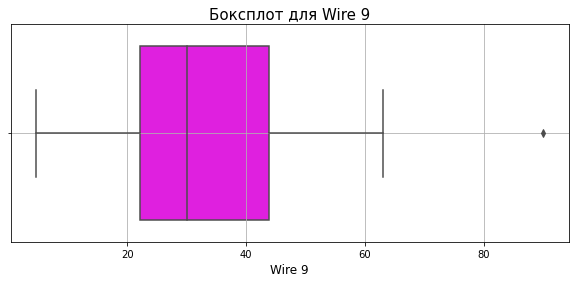

In [36]:
explore_dataframe(wire_new, wire_description)

In [37]:
show_missing_data(wire_new)

,missing_values_count,missing_values_percent
key,0,0.000000
Wire 1,26,0.843882
Wire 2,2002,64.978903
Wire 3,3018,97.955209
Wire 4,3067,99.545602
Wire 5,3080,99.967543
Wire 6,3008,97.630639
Wire 7,3070,99.642973
Wire 8,3062,99.383317
Wire 9,3052,99.058747


In [38]:
columns_to_drop = ['Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9']
wire_new.drop(columns=columns_to_drop,  inplace=True)

In [39]:
wire_new

,key,Wire 1,Wire 2
0,1,60.059998,NaN
1,2,96.052315,NaN
2,3,91.160157,NaN
3,4,89.063515,NaN
4,5,89.238236,9.11456
...,...,...,...
3076,3237,38.088959,NaN
3077,3238,56.128799,NaN
3078,3239,143.357761,NaN
3079,3240,34.070400,NaN


In [40]:
wire_time_new.drop(columns=columns_to_drop,  inplace=True)

Основная информация о наборе данных:
data_wire_time_new.csv — данные о проволочных материалах (время)

Основная информация о data_wire_time_new.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.3+ KB
None

Первые 5 строк data_wire_time_new.csv:
   key               Wire 1               Wire 2
0    1  2019-05-03 11:06:19                  NaN
1    2  2019-05-03 11:36:50                  NaN
2    3  2019-05-03 12:11:46                  NaN
3    4  2019-05-03 12:43:22                  NaN
4    5  2019-05-03 13:20:44  2019-05-03 13:15:34

Описательная статистика числовых столбцов для data_wire_time_new.csv:
               key
count  3081.000000
mean   1623.426485
std     932.996726
min       1.000000
25%     8

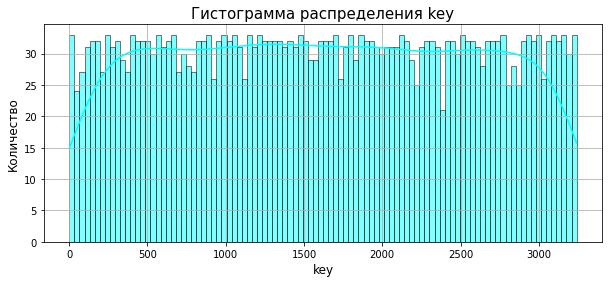

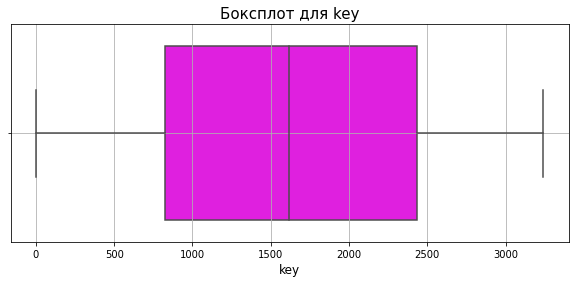

In [41]:
explore_dataframe(wire_time_new, wire_time_description)

Завершим этот этап. Посмотрели распределение данных. Убрали часть признаков, посколько их очень мало. Привели значения веремени к правильному типу, посчитали время нагрева дуги. 

## Шаг 3. Объединение данных

Объединим данные в одну табличку. Попутно добавим дополнительные столбки и удалим исходники. 

In [42]:
arc_new = arc_new.drop(columns=['Начало нагрева дугой', 'Конец нагрева дугой'])
arc_new.head(10)

,key,Активная мощность,Реактивная мощность,Общее время нагрева дугой
0,1,0.305130,0.211253,228
1,1,0.765658,0.477438,185
2,1,0.580313,0.430460,172
3,1,0.518496,0.379979,365
4,1,0.867133,0.643691,148
5,2,0.381124,0.220351,137
6,2,0.261665,0.205527,338
7,2,0.710297,0.484962,126
8,2,0.786322,0.542517,210
9,3,1.101678,0.820856,280


In [43]:
arc_new_gouped =arc_new.groupby('key').sum().reset_index()

In [44]:
arc_new_gouped.head(10)

,key,Активная мощность,Реактивная мощность,Общее время нагрева дугой
0,1,3.036730,2.142821,1098
1,2,2.139408,1.453357,811
2,3,4.063641,2.937457,655
3,4,2.706489,2.056992,741
4,5,2.252950,1.687991,869
5,6,2.725274,1.881313,952
6,7,2.626877,1.960419,673
7,8,2.678958,2.096952,913
8,9,3.520820,2.527365,625
9,10,3.118778,2.154941,825


<div>
    <p><u><b>КОММЕНТАРИИ СТУДЕНТА</b></u></p>
    <p>Вот тут не понял. В какие-то ковш добавили Булку номер 4 - 81 едеиницу, в другой не добавили, поэтому поставили 0. В чем ошибка? </p>
</div>

In [53]:
data = pd.merge(arc_new_gouped, bulk_new, on='key', how='inner')
data = pd.merge(data, wire_new, on='key', how='inner')
data = pd.merge(data, combined_data, on='key', how='inner')
data = pd.merge(data, gas_new, on='key', how='inner')

In [54]:
data.fillna(0, inplace=True)

In [55]:
data

,key,Активная мощность,Реактивная мощность,Общее время нагрева дугой,Bulk 3,Bulk 4,Bulk 12,Bulk 14,Bulk 15,Wire 1,Wire 2,Время первой замеры,Первая температура,Время последней замеры,Последняя температура,Время между замерами,Газ 1
0,1,3.036730,2.142821,1098,0.0,43.0,206.0,150.0,154.0,60.059998,0.00000,2019-05-03 11:02:04,1571.0,2019-05-03 11:30:38,1613.0,1714,29.749986
1,2,2.139408,1.453357,811,0.0,73.0,206.0,149.0,154.0,96.052315,0.00000,2019-05-03 11:34:04,1581.0,2019-05-03 11:55:09,1602.0,1265,12.555561
2,3,4.063641,2.937457,655,0.0,34.0,205.0,152.0,153.0,91.160157,0.00000,2019-05-03 12:06:44,1596.0,2019-05-03 12:35:57,1599.0,1753,28.554793
3,4,2.706489,2.056992,741,0.0,81.0,207.0,153.0,154.0,89.063515,0.00000,2019-05-03 12:39:27,1601.0,2019-05-03 12:59:47,1625.0,1220,18.841219
4,5,2.252950,1.687991,869,0.0,78.0,203.0,151.0,152.0,89.238236,9.11456,2019-05-03 13:11:03,1576.0,2019-05-03 13:36:39,1602.0,1536,5.413692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,2495,3.168133,2.210936,723,21.0,0.0,256.0,129.0,223.0,89.150879,0.00000,2019-08-10 11:27:47,1570.0,2019-08-10 11:50:47,1591.0,1380,7.125735
2325,2496,4.174918,2.872031,940,0.0,63.0,256.0,129.0,226.0,114.179527,0.00000,2019-08-10 11:56:48,1554.0,2019-08-10 12:25:13,1591.0,1705,9.412616
2326,2497,3.605239,2.452092,569,0.0,85.0,230.0,124.0,226.0,94.086723,9.04800,2019-08-10 12:37:26,1571.0,2019-08-10 12:53:28,1589.0,962,6.271699
2327,2498,3.202310,2.239820,750,90.0,0.0,206.0,129.0,207.0,118.110717,0.00000,2019-08-10 12:58:11,1591.0,2019-08-10 13:23:31,1594.0,1520,14.953657


In [56]:
data = data.drop(columns=['Время последней замеры', 'Время первой замеры'])

In [57]:
data = data.drop(columns=['key'])

In [58]:
data.head()

,Активная мощность,Реактивная мощность,Общее время нагрева дугой,Bulk 3,Bulk 4,Bulk 12,Bulk 14,Bulk 15,Wire 1,Wire 2,Первая температура,Последняя температура,Время между замерами,Газ 1
0,3.036730,2.142821,1098,0.0,43.0,206.0,150.0,154.0,60.059998,0.00000,1571.0,1613.0,1714,29.749986
1,2.139408,1.453357,811,0.0,73.0,206.0,149.0,154.0,96.052315,0.00000,1581.0,1602.0,1265,12.555561
2,4.063641,2.937457,655,0.0,34.0,205.0,152.0,153.0,91.160157,0.00000,1596.0,1599.0,1753,28.554793
3,2.706489,2.056992,741,0.0,81.0,207.0,153.0,154.0,89.063515,0.00000,1601.0,1625.0,1220,18.841219
4,2.252950,1.687991,869,0.0,78.0,203.0,151.0,152.0,89.238236,9.11456,1576.0,1602.0,1536,5.413692


In [59]:
data

,Активная мощность,Реактивная мощность,Общее время нагрева дугой,Bulk 3,Bulk 4,Bulk 12,Bulk 14,Bulk 15,Wire 1,Wire 2,Первая температура,Последняя температура,Время между замерами,Газ 1
0,3.036730,2.142821,1098,0.0,43.0,206.0,150.0,154.0,60.059998,0.00000,1571.0,1613.0,1714,29.749986
1,2.139408,1.453357,811,0.0,73.0,206.0,149.0,154.0,96.052315,0.00000,1581.0,1602.0,1265,12.555561
2,4.063641,2.937457,655,0.0,34.0,205.0,152.0,153.0,91.160157,0.00000,1596.0,1599.0,1753,28.554793
3,2.706489,2.056992,741,0.0,81.0,207.0,153.0,154.0,89.063515,0.00000,1601.0,1625.0,1220,18.841219
4,2.252950,1.687991,869,0.0,78.0,203.0,151.0,152.0,89.238236,9.11456,1576.0,1602.0,1536,5.413692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,3.168133,2.210936,723,21.0,0.0,256.0,129.0,223.0,89.150879,0.00000,1570.0,1591.0,1380,7.125735
2325,4.174918,2.872031,940,0.0,63.0,256.0,129.0,226.0,114.179527,0.00000,1554.0,1591.0,1705,9.412616
2326,3.605239,2.452092,569,0.0,85.0,230.0,124.0,226.0,94.086723,9.04800,1571.0,1589.0,962,6.271699
2327,3.202310,2.239820,750,90.0,0.0,206.0,129.0,207.0,118.110717,0.00000,1591.0,1594.0,1520,14.953657


Объеденили данные в одну табличку. Добавили столбики общее время нагрева дугой, разницу между первым и послденим замером. Пропущенные значения заменили на нули. Удилии столбик key.

## Шаг 4. Исследовательский анализ и предобработка данных объединённого датафрейма 

Основная информация о наборе данных:
Итоговый датафрейм

Основная информация о Итоговый датафрейм:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2328
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Активная мощность          2329 non-null   float64
 1   Реактивная мощность        2329 non-null   float64
 2   Общее время нагрева дугой  2329 non-null   int64  
 3   Bulk 3                     2329 non-null   float64
 4   Bulk 4                     2329 non-null   float64
 5   Bulk 12                    2329 non-null   float64
 6   Bulk 14                    2329 non-null   float64
 7   Bulk 15                    2329 non-null   float64
 8   Wire 1                     2329 non-null   float64
 9   Wire 2                     2329 non-null   float64
 10  Первая температура         2329 non-null   float64
 11  Последняя температура      2329 non-null   float64
 12  Время

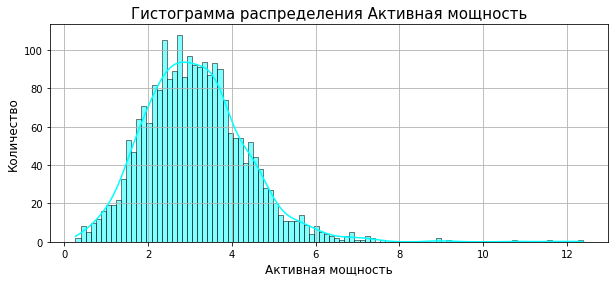

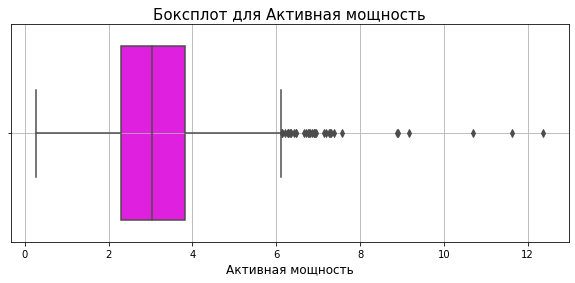

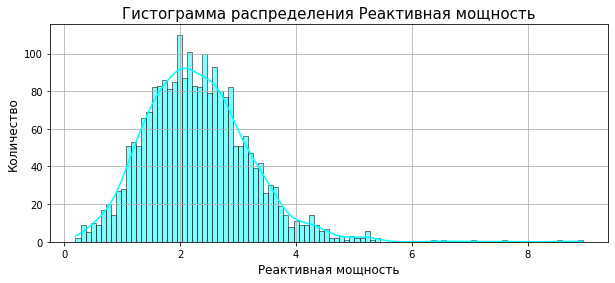

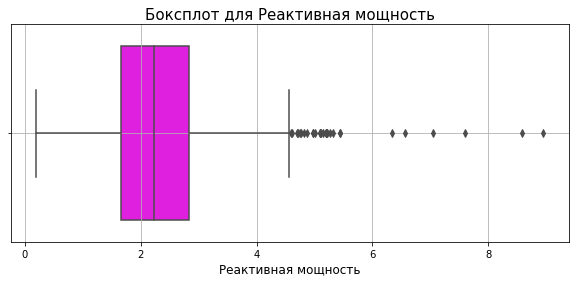

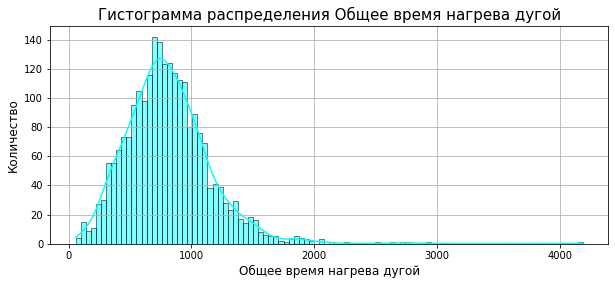

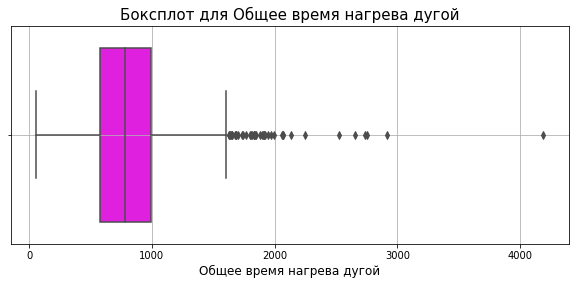

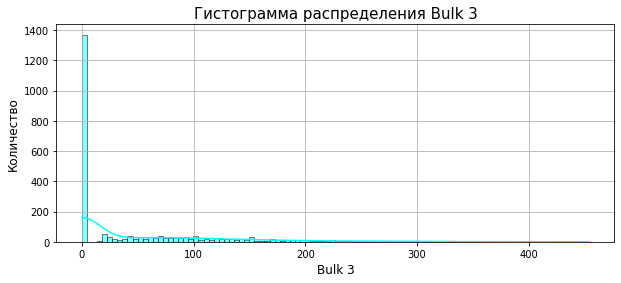

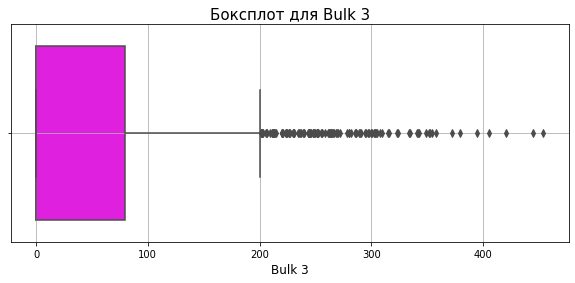

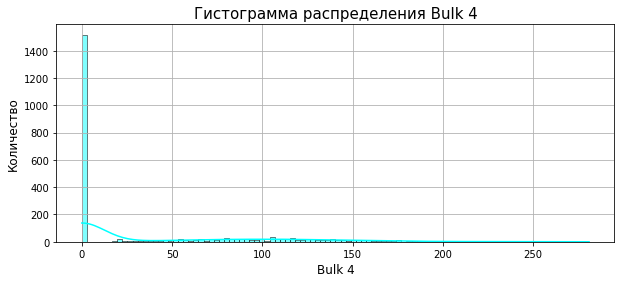

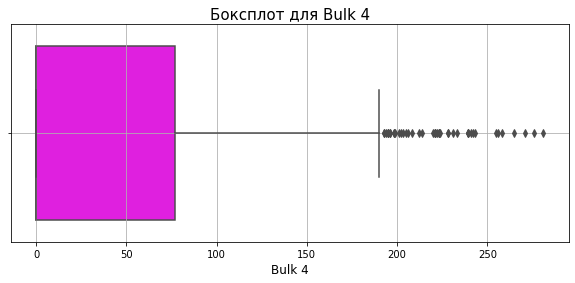

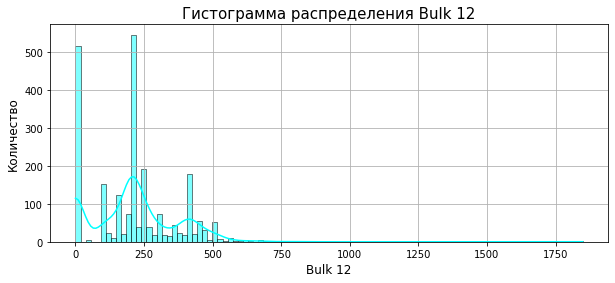

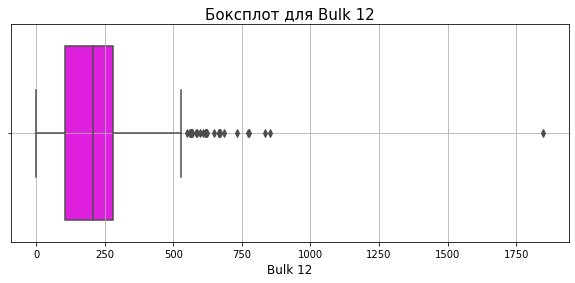

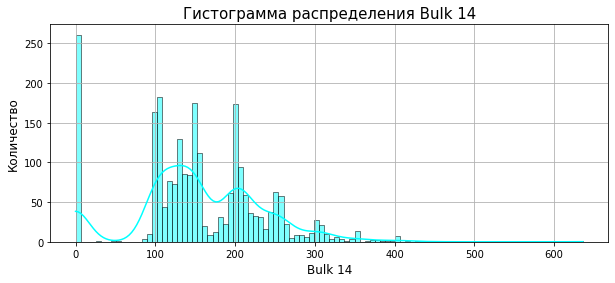

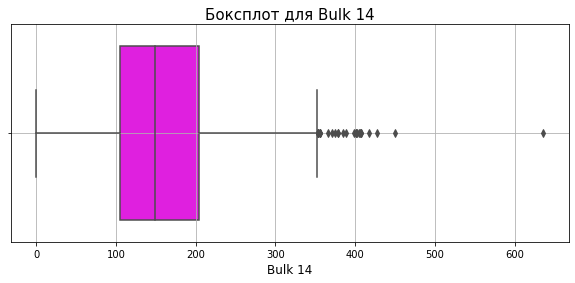

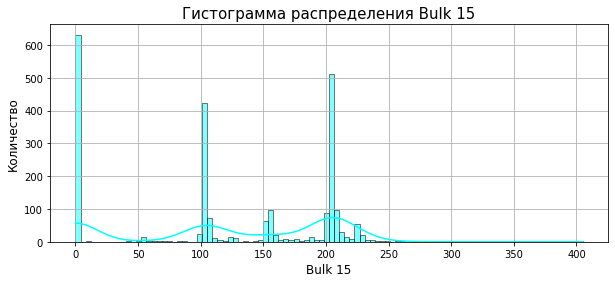

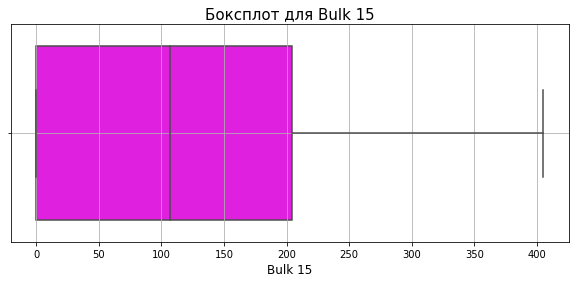

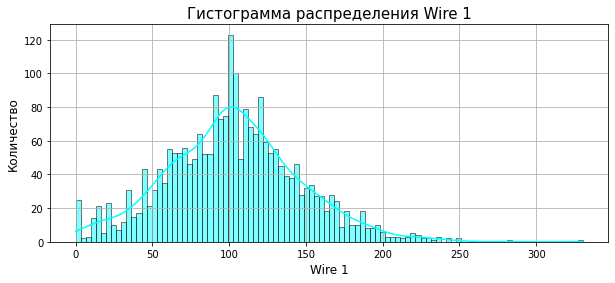

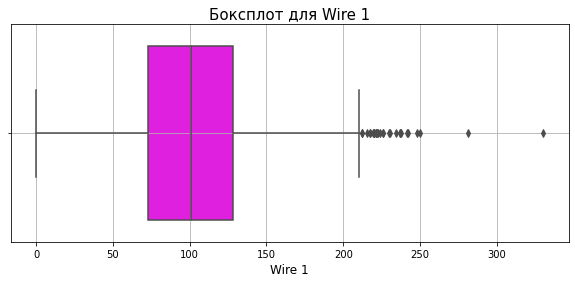

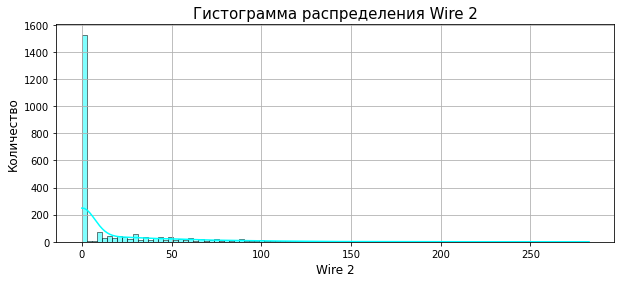

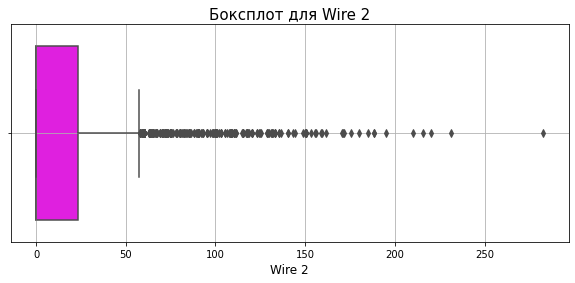

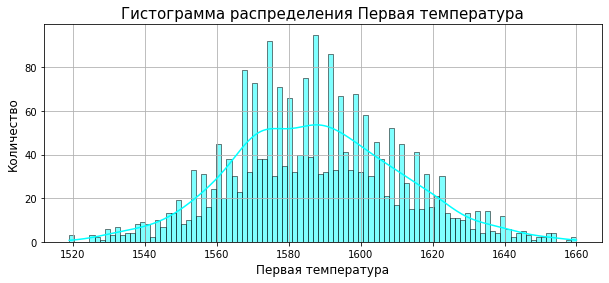

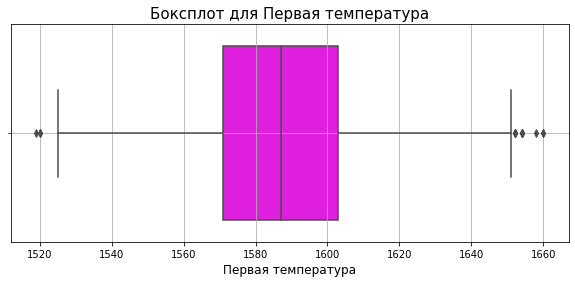

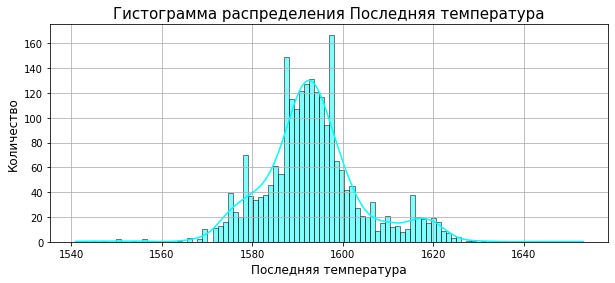

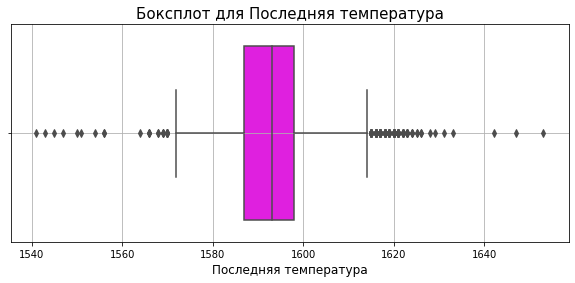

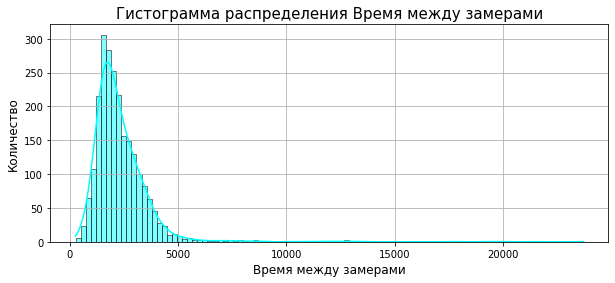

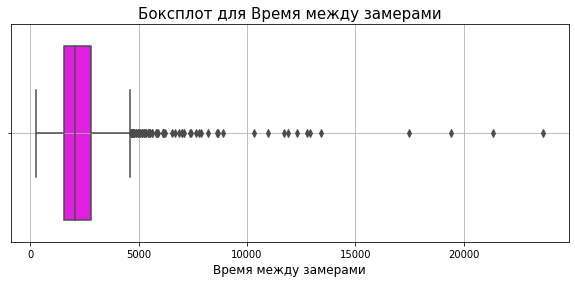

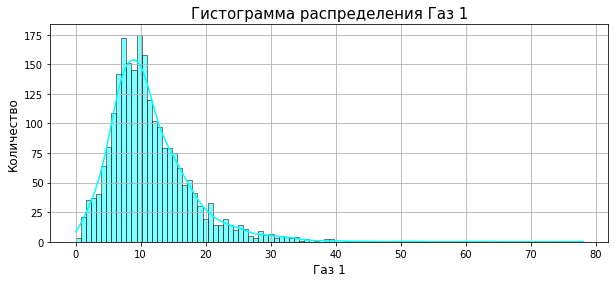

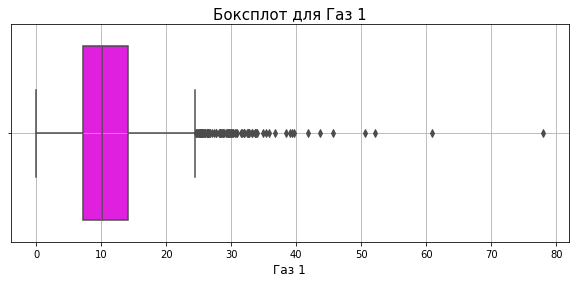

In [60]:
explore_dataframe(data, data_description)

In [61]:
corr = data.corr()
corr

,Активная мощность,Реактивная мощность,Общее время нагрева дугой,Bulk 3,Bulk 4,Bulk 12,Bulk 14,Bulk 15,Wire 1,Wire 2,Первая температура,Последняя температура,Время между замерами,Газ 1
Активная мощность,1.000000,0.992424,0.721249,0.103241,0.005563,0.286073,0.300046,0.169845,0.137923,0.062463,-0.154657,0.177339,0.539479,0.370985
Реактивная мощность,0.992424,1.000000,0.713422,0.100949,0.004647,0.285721,0.295930,0.168109,0.138365,0.061848,-0.152598,0.171878,0.534577,0.367954
Общее время нагрева дугой,0.721249,0.713422,1.000000,0.092682,-0.028237,0.466789,0.461181,0.295854,0.055495,0.054543,-0.384507,0.278716,0.562901,0.396306
Bulk 3,0.103241,0.100949,0.092682,1.000000,-0.295431,0.018371,0.010772,-0.012860,0.039637,0.095723,-0.113925,-0.035977,0.022827,0.059628
Bulk 4,0.005563,0.004647,-0.028237,-0.295431,1.000000,0.105791,-0.090602,0.101514,0.297591,-0.268142,0.164936,0.187970,0.002708,0.017578
Bulk 12,0.286073,0.285721,0.466789,0.018371,0.105791,1.000000,0.481541,0.614479,0.170167,-0.098263,-0.080115,0.267424,0.210368,0.217332
Bulk 14,0.300046,0.295930,0.461181,0.010772,-0.090602,0.481541,1.000000,0.265354,-0.053835,0.036309,-0.181076,0.114617,0.174947,0.268889
Bulk 15,0.169845,0.168109,0.295854,-0.012860,0.101514,0.614479,0.265354,1.000000,0.118437,-0.096415,-0.063041,0.266414,0.100210,0.043624
Wire 1,0.137923,0.138365,0.055495,0.039637,0.297591,0.170167,-0.053835,0.118437,1.000000,-0.068301,0.262598,0.317575,0.153379,0.117313
Wire 2,0.062463,0.061848,0.054543,0.095723,-0.268142,-0.098263,0.036309,-0.096415,-0.068301,1.000000,-0.100733,-0.206672,0.060019,0.104248


In [62]:
data = data.drop(columns=['Реактивная мощность'])

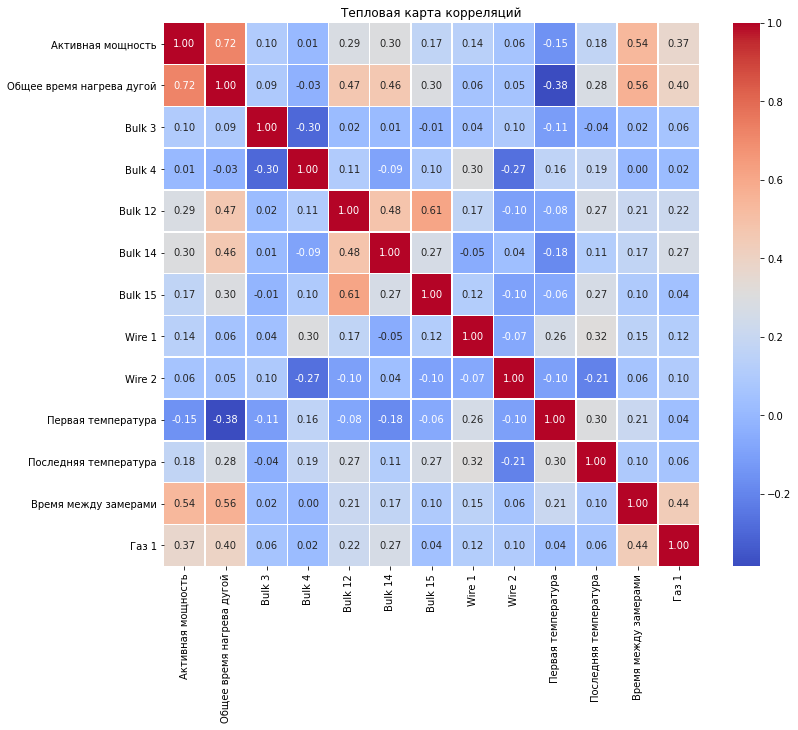

In [63]:
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Тепловая карта корреляций")
plt.show()

Посмотрели распределение даннх. Почти везде графики красивые. На гистограммах виден купол распределения Пуссона. 

<div>
    <p><u><b>КОММЕНТАРИИ СТУДЕНТА</b></u></p>
    <p>Да, есть мультиколлиниарность, удалили Рекативную мощность. На самом деле тут много вариантов, можно было сделать общий столбик мощность(у меня так и было вначале). В общем честно говоря, я отправил усеченный вариант с нормальной метрикой. Сначала метрика была 15 потом улучшалась и улучшалась дошла до 4,9 на тесте. Я добавлял и добавлял разные фичи. Но потом понял, что можно все упростить, а метрика не сильно поменяется. Добавлял время между wire и основным замером, пытался сделать проект со всеми данными признаками и тп. потом метрики начали ухудшаться. В итоге я все упростил.</p>
</div>

## Шаг 5. Подготовка данных

In [64]:
random_state = 60524
train, test = train_test_split(data, test_size = 0.25, random_state = random_state)

In [65]:
x_train = train.drop(['Последняя температура'], axis = 1)
y_train = train['Последняя температура']
x_test = test.drop(['Последняя температура'], axis = 1)
y_test = test['Последняя температура']

Разделили данные на тренировочную и тестовую выборки согласно заданию. Задали значение random_state. 

## Шаг 6. Обучение моделей машинного обучения

In [66]:
%%time

regressor = LinearRegression()
cv_MAE_LR = (cross_val_score(regressor, 
                             x_train, 
                             y_train, 
                             cv=7, 
                             scoring='neg_mean_absolute_error').mean() * -1)
print('Mean MAE from CV of LinearRegression =', cv_MAE_LR)

Mean MAE from CV of LinearRegression = 6.219538598970203
CPU times: user 97.5 ms, sys: 51.7 ms, total: 149 ms
Wall time: 53.7 ms


In [67]:
%%time

regressor = CatBoostRegressor(verbose=False, random_state=random_state)
cv_MAE_CBR = (cross_val_score(regressor, 
                             x_train, 
                             y_train, 
                             cv=7, 
                             scoring='neg_mean_absolute_error').mean() * -1)
print('Mean MAE from CV of CatBoostRegressor =', cv_MAE_CBR)
print()
print("Best parameters set found on development set:")
print()
best_params_CBR = CatBoostRegressor(verbose=False, 
                                    random_state=random_state).fit(x_train, 
                                        y_train).get_all_params()
best_params_CBR

Mean MAE from CV of CatBoostRegressor = 6.031911880090931

Best parameters set found on development set:

CPU times: user 23.4 s, sys: 515 ms, total: 24 s
Wall time: 30.4 s


{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 60524,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.04471199959516525,
 'score_function': 'Cosine',
 'task_t

In [68]:
%%time

lgbm = LGBMRegressor() 
lgbm_params = [{'num_leaves':[x for x in range(10,26)], 
                'learning_rate':[.1],
                'random_state':[random_state]}]

gscv = GridSearchCV(lgbm, lgbm_params, scoring='neg_mean_absolute_error', cv=5)

gscv.fit(x_train, y_train)

print('Параметры:', gscv.best_params_)
print()

MAE_lgbm = (max(gscv.cv_results_['mean_test_score'])*-1)
print('MAE для LGBMRegressor -', MAE_lgbm)
print()

Параметры: {'learning_rate': 0.1, 'num_leaves': 25, 'random_state': 60524}

MAE для LGBMRegressor - 6.216211223434619

CPU times: user 11.1 s, sys: 31.5 ms, total: 11.1 s
Wall time: 11.1 s


Обучили три модели. Линейную регрессию, Кэтбуст и ЛайтGBM. 

## Шаг 7. Выбор лучшей модели

In [69]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "CatBoost Regressor", "LGBM Regressor"],
    "MAE": [cv_MAE_LR, cv_MAE_CBR, MAE_lgbm],
    "Best Params": ["N/A", best_params_CBR, gscv.best_params_]
})
results

,Model,MAE,Best Params
0,Linear Regression,6.219539,N/A
1,CatBoost Regressor,6.031912,"{'nan_mode': 'Min', 'eval_metric': 'RMSE', 'it..."
2,LGBM Regressor,6.216211,"{'learning_rate': 0.1, 'num_leaves': 25, 'rand..."


In [70]:
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print('Средняя абсолютная ошибка на тестовой выборке:', mae)


Средняя абсолютная ошибка на тестовой выборке: 5.793257900959591


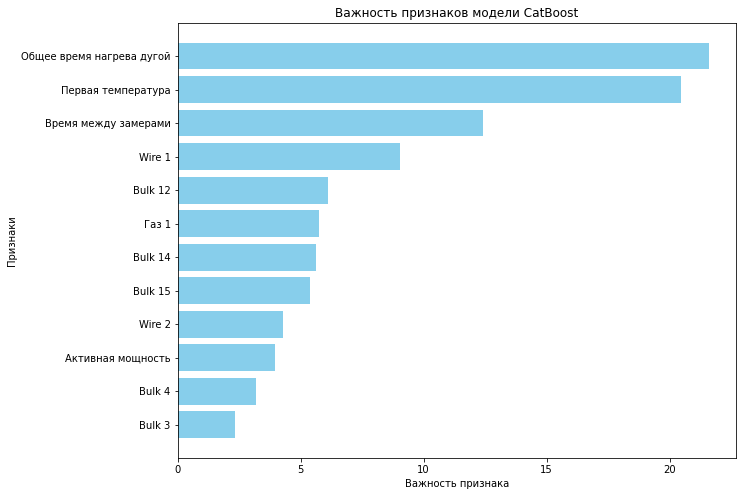

In [71]:

feature_importances = regressor.get_feature_importance()
feature_names = x_train.columns

# Создание массива индексов, сортированных по значению важности признаков от большего к меньшему
sorted_indices = np.argsort(feature_importances)[::-1]

# Создание графика
plt.figure(figsize=(10, 8))  # Можно установить размер для лучшего отображения
plt.barh(feature_names[sorted_indices], feature_importances[sorted_indices], color='skyblue')
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Важность признаков модели CatBoost')
plt.gca().invert_yaxis()  # Инвертировать ось Y для лучшего восприятия
plt.show()


Выбрали Кэтбуст, проверили на тестовой выборке 5.049144749493547. По условию задачи метрика устраивает, модель работает.

## Шаг 8. Общий вывод и рекомендации заказчику

Итак, план работы выполнен. Необходимы метрики получены.  
* Шаг 1. Загрузка данных   
Загрузили данные.   
* Шаг 2. Исследовательский анализ и предобработка данных   
Познакомились с данными. Поскольку файлов несколько, написали функцию для исследовательского анализа, которая строит гистограммы и диаграммы размаха для количественных признаков. На этом этапе сразу обнаружили несколько грубых выбросов и удалили их. Например минусовые значения в ркативной мощности, температура меньше чем температцра плавления стали.   
* Шаг 3. Объединение данных Объедините выбранные вами признаки в один датафрейм по ключу.   
Объединили данные в одну таблицу, Объеденили данные в одну табличку. Добавили столбики общее время нагрева дугой, разницу между первым и послденим замером. Пропущенные значения заменили на нули. Удилии временные столбики и key.   
* Шаг 4. Исследовательский анализ и предобработка данных объединённого датафрейма
Посмотрели распределение данных. Почти везде графики красивые. На гистограммах виден купол распределения Пуссона. Посмотрели корреляцию между признаками.   
* Шаг 5. Подготовка данных  
Разделили данные на тренировочную и тестовую выборки согласно заданию. Задали значение random_state.   
* Шаг 6. Обучение моделей машинного обучения   
Обучили три модели. Линейную регрессию, Кэтбуст и ЛайтGBM.   
Получили следующие метрики   
 1. Linear Regression	6.219539   
 2. CatBoost Regressor 6.031912  
 3. LGBM Regressor	6.082725388989849          	
* Шаг 7. Выбор лучшей модели  
Выбрали CatBoost Regressor	на тесте получили 5.793257900959591. Метрика подтверждает, что модель работает как надо. 